# Classificação Brasileira de Ocupações (CBO)

**Autor:** Alexandre Pereira de Oliveira


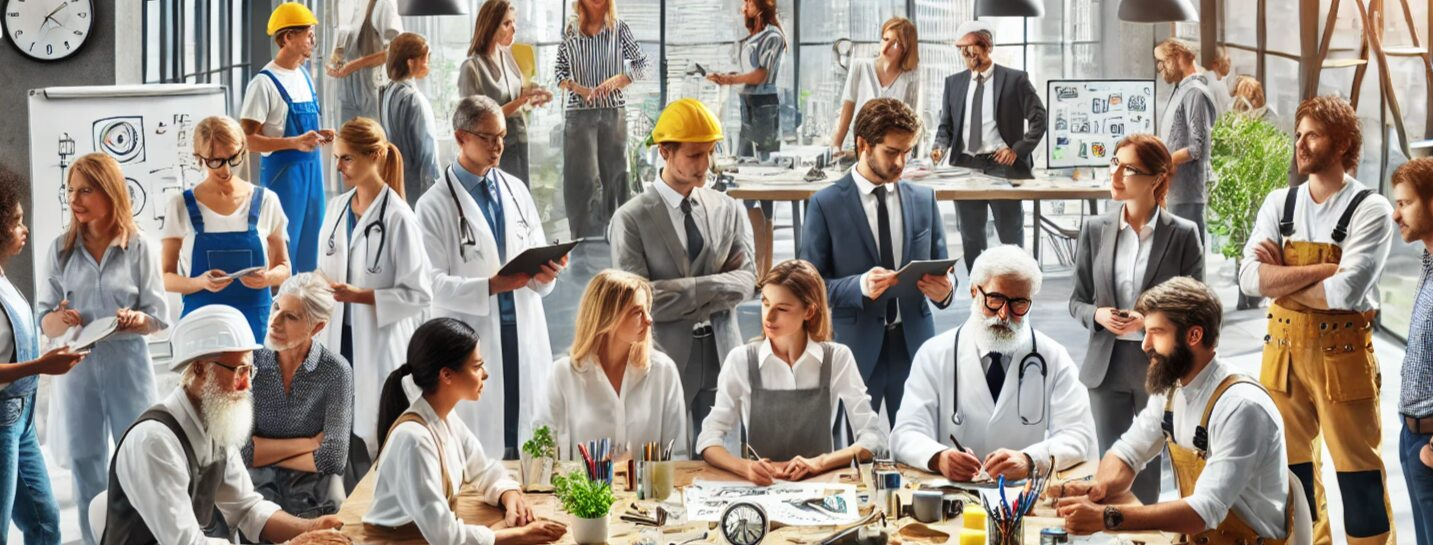

### O que é CBO

A **Classificação Brasileira de Ocupações(CBO)**, instituída pelo Ministério do Trabalho e Emprego (MTE), constitui o sistema oficial para identificação e organização das ocupações no mercado de trabalho brasileiro. Este instrumento atribui a cada ocupação um código específico, acompanhado de uma descrição detalhada que inclui as principais atividades, competências requeridas, ambientes de atuação e condições de exercício profissional.

A principal função da CBO é padronizar nomenclaturas e atribuições em diversas áreas profissionais, promovendo uma comunicação uniforme entre empresas, trabalhadores e órgãos públicos. Além disso, a classificação subsidia o planejamento de políticas públicas, orienta o desenho de cursos de capacitação profissional e contribui para a geração de estatísticas sobre o mercado de trabalho, como as produzidas pelo Instituto Brasileiro de Geografia e Estatística (IBGE). Dessa forma, a CBO desempenha um papel estratégico na gestão e análise das dinâmicas laborais no Brasil.

### A importância do CBO e sua transformação em Linked Open Data

O Código Brasileiro de Ocupações (CBO) é uma ferramenta essencial para o mercado de trabalho brasileiro, pois padroniza e organiza as funções profissionais, facilitando o planejamento de políticas públicas e o cumprimento de obrigações trabalhistas. Sua aplicação promove a coleta e análise de dados consistentes, fundamentais para entender as dinâmicas do mercado e suas tendências.

A transformação do CBO para o formato Linked Open Data (LOD) ampliaria seu potencial, permitindo interoperabilidade com bases de dados internacionais, como o ESCO e o ISCO. Além disso, a adoção de padrões abertos proporcionaria maior acessibilidade, transparência e reutilização dos dados, facilitando a integração com sistemas de inteligência artificial e análises avançadas. Dessa forma, o CBO em formato LOD representaria um avanço estratégico para alinhar o Brasil às práticas globais de gestão e análise do mercado de trabalho.


### Fonte de dados

Os dados foram obtidos diretamente do site na URL: http://www.mtecbo.gov.br/cbosite/pages/downloads.jsf

### Carregando dados

In [1]:
# Montando arquivo
from google.colab import drive
drive.mount('/content/drive')
cbo_base_path = '/content/drive/MyDrive/Ontology/CBO'
#!ls '/content/drive/MyDrive/Ontology'

Mounted at /content/drive


In [5]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("CBO").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)
spark.conf.set("spark.sql.repl.eagerEval.maxNumRows", 20)


# Carregando dados
familia = spark.read.csv(cbo_base_path+"/CBO2002 - Familia.csv", header=True, inferSchema=True, encoding="ISO-8859-1", sep=";")
grande_grupo = spark.read.csv(cbo_base_path+"/CBO2002 - Grande Grupo.csv", header=True, inferSchema=True, encoding="ISO-8859-1", sep=";")
ocupacao = spark.read.csv(cbo_base_path+"/CBO2002 - Ocupacao.csv", header=True, inferSchema=True, encoding="ISO-8859-1", sep=";")
perfilOcupacional = spark.read.csv(cbo_base_path+"/CBO2002 - PerfilOcupacional.csv", header=True, inferSchema=True, encoding="ISO-8859-1", sep=";")
sinonimo = spark.read.csv(cbo_base_path+"/CBO2002 - Sinonimo.csv", header=True, inferSchema=True, encoding="ISO-8859-1", sep=";")
subgrupo_principal = spark.read.csv(cbo_base_path+"/CBO2002 - SubGrupo Principal.csv", header=True, inferSchema=True, encoding="ISO-8859-1", sep=";")
subgrupo = spark.read.csv(cbo_base_path+"/CBO2002 - SubGrupo.csv", header=True, inferSchema=True, encoding="ISO-8859-1", sep=";")

## Etendimento da estrutura de dados

### Família

**Família**: é a unidade do sistema de classificação. Para efeitos práticos, define-se a ocupação como o conjunto de postos de trabalho substancialmente iguais quanto a sua natureza e as qualificações exigidas (o posto de trabalho corresponde a cada unidade de trabalho disponível ou satisfeita). Constitui-se de tarefas, obrigações e responsabilidades atribuídas a cada trabalhador. Pode-se ainda conceituar a ocupação como o conjunto articulado de funções, tarefas e operações destinadas à obtenção de produtos ou serviços. Representado pelo código total de 4 números.

*Texto retirado de: http://www.mtecbo.gov.br/cbosite/pages/informacoesGerais.jsf#11*  em 23/11/24

In [21]:
print("Quantidade de registros:", familia.count())
familia.printSchema()

Quantidade de registros: 627
root
 |-- CODIGO: integer (nullable = true)
 |-- TITULO: string (nullable = true)



In [22]:
familia.show(10, truncate = False)

+------+-----------------------------------------------------+
|CODIGO|TITULO                                               |
+------+-----------------------------------------------------+
|101   |Oficiais generais das forças armadas                 |
|102   |Oficiais das forças armadas                          |
|103   |Praças das forças armadas                            |
|201   |Oficiais superiores da polícia militar               |
|202   |Capitães da  polícia militar                         |
|203   |Tenentes da polícia militar                          |
|211   |Subtenentes e sargentos da policia militar           |
|212   |Cabos e soldados da polícia militar                  |
|301   |Oficiais superiores do corpo de bombeiros militar    |
|302   |Oficiais intermediários do corpo de bombeiros militar|
+------+-----------------------------------------------------+
only showing top 10 rows



### Grande Grupo

É a categoria de classificação mais agregada. Reúne amplas áreas de emprego, mais do que tipos específicos de trabalho. Por força de sua amplitude, nem sempre se estabelecem inter-relações dos conjuntos aí reunidos. Representado pelo 1º número do código da família.

*Texto retirado de: http://www.mtecbo.gov.br/cbosite/pages/informacoesGerais.jsf#11*  em 23/11/24

In [23]:
print("Quantidade de registros:", grande_grupo.count())
grande_grupo.printSchema()

Quantidade de registros: 10
root
 |-- CODIGO: integer (nullable = true)
 |-- TITULO: string (nullable = true)



In [24]:
grande_grupo.show(10, truncate = False,)

+------+----------------------------------------------------------------------------------------------------------------------------------+
|CODIGO|TITULO                                                                                                                            |
+------+----------------------------------------------------------------------------------------------------------------------------------+
|0     |MEMBROS DAS FORÇAS ARMADAS, POLICIAIS E BOMBEIROS MILITARES                                                                       |
|1     |MEMBROS SUPERIORES DO PODER PÚBLICO, DIRIGENTES DE ORGANIZAÇÕES DE INTERESSE PÚBLICO E DE EMPRESAS, GERENTES                      |
|2     |PROFISSIONAIS DAS CIÊNCIAS E DAS ARTES                                                                                            |
|3     |TÉCNICOS DE NIVEL MÉDIO                                                                                                           |
|4     |TRABALHADORE

### Ocupação

Ocupação é um conceito sintético não natural, artificialmente construído pelos analistas ocupacionais. O que existe no mundo concreto são as atividades exercidas pelo cidadão em um emprego ou outro tipo de relação de trabalho (autônomo, por exemplo).

É a agregação de empregos ou situações de trabalho similares quanto às atividades realizadas.

O **título ocupacional**, em uma classificação, surge da agregação de situações similares de emprego e/ou trabalho. Outros dois conceitos sustentam a construção da nomenclatura da CBO 2002:


1.   Emprego ou situação de trabalho: definido como um conjunto de atividades desempenhadas por uma pessoa, com ou sem vínculo empregatício. Esta é a unidade estatística da CBO.
2.   Competências mobilizadas para o desempenho das atividades do emprego ou trabalho.


*Texto retirado de: http://www.mtecbo.gov.br/cbosite/pages/informacoesGerais.jsf#11* em 23/11/24

In [25]:
print("Quantidade de registros:", ocupacao.count())
ocupacao.printSchema()

Quantidade de registros: 2713
root
 |-- CODIGO: integer (nullable = true)
 |-- TITULO: string (nullable = true)



In [26]:
ocupacao.show(10, truncate = False,)

+------+------------------------------+
|CODIGO|TITULO                        |
+------+------------------------------+
|10105 |Oficial general da aeronáutica|
|10110 |Oficial general do exército   |
|10115 |Oficial general da marinha    |
|10205 |Oficial da aeronáutica        |
|10210 |Oficial do exército           |
|10215 |Oficial da marinha            |
|10305 |Praça da aeronáutica          |
|10310 |Praça do exército             |
|10315 |Praça da marinha              |
|20105 |Coronel da polícia militar    |
+------+------------------------------+
only showing top 10 rows



### Perfil Ocupacional

O Perfil Ocupacional do CBO (Classificação Brasileira de Ocupações) é um conjunto de informações sobre as atividades, competências, habilidades e atribuições específicas de cada ocupação reconhecida no mercado de trabalho brasileiro.

In [27]:
print("Quantidade de registros:", perfilOcupacional.count())
perfilOcupacional.printSchema()

Quantidade de registros: 176456
root
 |-- COD_GRANDE_GRUPO: integer (nullable = true)
 |-- COD_SUBGRUPO_PRINCIPAL: integer (nullable = true)
 |-- COD_SUBGRUPO: integer (nullable = true)
 |-- COD_FAMILIA: integer (nullable = true)
 |-- COD_OCUPACAO: integer (nullable = true)
 |-- SGL_GRANDE_AREA: string (nullable = true)
 |-- NOME_GRANDE_AREA: string (nullable = true)
 |-- COD_ATIVIDADE: integer (nullable = true)
 |-- NOME_ATIVIDADE: string (nullable = true)



In [28]:
perfilOcupacional.show(10)

+----------------+----------------------+------------+-----------+------------+---------------+--------------------+-------------+--------------------+
|COD_GRANDE_GRUPO|COD_SUBGRUPO_PRINCIPAL|COD_SUBGRUPO|COD_FAMILIA|COD_OCUPACAO|SGL_GRANDE_AREA|    NOME_GRANDE_AREA|COD_ATIVIDADE|      NOME_ATIVIDADE|
+----------------+----------------------+------------+-----------+------------+---------------+--------------------+-------------+--------------------+
|               0|                     2|          20|        201|       20105|              A|COMANDAR UNIDADES...|            1|Desenvolver ativi...|
|               0|                     2|          20|        201|       20105|              A|COMANDAR UNIDADES...|            2|Realizar estudos ...|
|               0|                     2|          20|        201|       20105|              A|COMANDAR UNIDADES...|            3|Coordenar ativida...|
|               0|                     2|          20|        201|       20105|         

#### NOME_GRANDE_AREA

A divisão mais ampla, que classifica ocupações de acordo com grandes segmentos econômicos, como Agricultura, Indústria, Comércio, Serviços, entre outros.

In [29]:
print("Quantidade de valores únicos:", perfilOcupacional.select("NOME_GRANDE_AREA").distinct().count())
perfilOcupacional.groupBy("NOME_GRANDE_AREA").count().orderBy("count", ascending=False).show(10, truncate = False,)

Quantidade de valores únicos: 4211
+----------------------------------------+-----+
|NOME_GRANDE_AREA                        |count|
+----------------------------------------+-----+
|DEMONSTRAR COMPETÊNCIAS PESSOAIS        |33138|
|COMUNICAR-SE                            |4735 |
|TRABALHAR COM SEGURANÇA                 |3274 |
|DIFUNDIR CONHECIMENTOS MÉDICOS          |1039 |
|REALIZAR CONSULTA E ATENDIMENTO MÉDICO  |977  |
|ELABORAR DOCUMENTOS MÉDICOS             |789  |
|TRATAR PACIENTES E CLIENTES             |745  |
|ELABORAR DOCUMENTAÇÃO TÉCNICA           |674  |
|IMPLEMENTAR AÇÕES PARA PROMOÇÃO DA SAÚDE|436  |
|ORIENTAR ALUNOS                         |408  |
+----------------------------------------+-----+
only showing top 10 rows



#### NOME_ATIVIDADE

Atividade exercida

In [30]:
print("Quantidade de valores únicos:", perfilOcupacional.select("NOME_ATIVIDADE").distinct().count())
perfilOcupacional.groupBy("NOME_ATIVIDADE").count().orderBy("count", ascending=False).show(10, truncate = False,)

Quantidade de valores únicos: 47183
+--------------------------------------------+-----+
|NOME_ATIVIDADE                              |count|
+--------------------------------------------+-----+
|Trabalhar em equipe                         |1368 |
|Demonstrar criatividade                     |802  |
|Demonstrar iniciativa                       |578  |
|Demonstrar flexibilidade                    |390  |
|Demonstrar capacidade de liderança          |329  |
|Elaborar relatórios                         |323  |
|Demonstrar capacidade de trabalhar em equipe|309  |
|Demonstrar capacidade de negociação         |290  |
|Demonstrar dinamismo                        |277  |
|Demonstrar capacidade de observação         |260  |
+--------------------------------------------+-----+
only showing top 10 rows



### Sinonimos

Representa os nome das ocupações que são sinônimos

In [31]:
print("Quantidade de registros:", sinonimo.count())
sinonimo.printSchema()

Quantidade de registros: 7804
root
 |-- CODIGO: integer (nullable = true)
 |-- TITULO: string (nullable = true)



In [32]:
sinonimo.show(10, truncate = False,)

+------+---------------------+
|CODIGO|TITULO               |
+------+---------------------+
|10105 |Brigadeiro           |
|10105 |Major-brigadeiro     |
|10105 |Marechal-do-ar       |
|10105 |Tenente-brigadeiro   |
|10110 |General-de-brigada   |
|10110 |General-de-divisão   |
|10110 |General-de-exército  |
|10110 |Marechal             |
|10115 |Almirante            |
|10115 |Almirante-de-esquadra|
+------+---------------------+
only showing top 10 rows



### Subgrupo Principal

 Trata-se de agrupamento mais restrito que o grande grupo, e configura, principalmente, as grandes linhas do mercado de trabalho. Representado pelos 2 primeiros números do código da família.

*Texto retirado de: http://www.mtecbo.gov.br/cbosite/pages/informacoesGerais.jsf#11*  em 23/11/24

In [33]:
print("Quantidade de registros:", subgrupo_principal.count())
subgrupo_principal.printSchema()

Quantidade de registros: 49
root
 |-- CODIGO: integer (nullable = true)
 |-- TITULO: string (nullable = true)



In [34]:
subgrupo_principal.show(10, truncate = False,)

+------+----------------------------------------------------------------------------------------------------------------------------------+
|CODIGO|TITULO                                                                                                                            |
+------+----------------------------------------------------------------------------------------------------------------------------------+
|1     |MEMBROS DAS FORÇAS ARMADAS                                                                                                        |
|2     |POLICIAIS MILITARES                                                                                                               |
|3     |BOMBEIROS MILITARES                                                                                                               |
|11    |MEMBROS SUPERIORES E DIRIGENTES DO PODER PÚBLICO                                                                                  |
|12    |DIRIGENTES D

 ### Subgroup

Também denominado grupo primário, grupo unitário e família ocupacional, reúne ocupações que apresentam estreito parentesco tanto em relação à natureza de trabalho quanto aos níveis de qualificação exigidos. Representado pelos 3 primeiros números do código da família.

*Texto retirado de: http://www.mtecbo.gov.br/cbosite/pages/informacoesGerais.jsf#11*  em 23/11/24

In [35]:
print("Quantidade de registros:", subgrupo.count())
subgrupo.printSchema()

Quantidade de registros: 195
root
 |-- CODIGO: integer (nullable = true)
 |-- TITULO: string (nullable = true)



In [36]:
subgrupo.show(10, truncate = False,)

+------+----------------------------------------------------------------------------------------------------------------------------------+
|CODIGO|TITULO                                                                                                                            |
+------+----------------------------------------------------------------------------------------------------------------------------------+
|10    |MEMBROS DAS FORÇAS ARMADAS                                                                                                        |
|20    |OFICIAIS DE POLÍCIA MILITAR                                                                                                       |
|21    |PRAÇAS DE POLÍCIA MILITAR                                                                                                         |
|30    |OFICIAIS DE BOMBEIRO MILITAR                                                                                                      |
|31    |PRAÇAS DE BO

## Preparação dos dados

In [6]:
# Realizando os joins
resultado = perfilOcupacional \
    .join(grande_grupo, perfilOcupacional.COD_GRANDE_GRUPO == grande_grupo.CODIGO, "left") \
    .join(subgrupo_principal, perfilOcupacional.COD_SUBGRUPO_PRINCIPAL == subgrupo_principal.CODIGO, "left") \
    .join(subgrupo, perfilOcupacional.COD_SUBGRUPO == subgrupo.CODIGO, "left") \
    .join(familia, perfilOcupacional.COD_FAMILIA == familia.CODIGO, "left") \
    .join(ocupacao, perfilOcupacional.COD_OCUPACAO == ocupacao.CODIGO, "left")

# Exibindo o resultado
resultado.show()

+----------------+----------------------+------------+-----------+------------+---------------+--------------------+-------------+--------------------+------+--------------------+------+--------------------+------+--------------------+------+--------------------+------+--------------------+
|COD_GRANDE_GRUPO|COD_SUBGRUPO_PRINCIPAL|COD_SUBGRUPO|COD_FAMILIA|COD_OCUPACAO|SGL_GRANDE_AREA|    NOME_GRANDE_AREA|COD_ATIVIDADE|      NOME_ATIVIDADE|CODIGO|              TITULO|CODIGO|              TITULO|CODIGO|              TITULO|CODIGO|              TITULO|CODIGO|              TITULO|
+----------------+----------------------+------------+-----------+------------+---------------+--------------------+-------------+--------------------+------+--------------------+------+--------------------+------+--------------------+------+--------------------+------+--------------------+
|               0|                     2|          20|        201|       20105|              A|COMANDAR UNIDADES...|        

In [7]:
# Realizando os joins
gg = grande_grupo.select(grande_grupo.TITULO.alias("GG_TITULO"),grande_grupo.CODIGO.alias("GG_CODIGO"))
sp = subgrupo_principal.select(subgrupo_principal.TITULO.alias("SP_TITULO"),subgrupo_principal.CODIGO.alias("SP_CODIGO"))
sg = subgrupo.select(subgrupo.TITULO.alias("SG_TITULO"),subgrupo.CODIGO.alias("SG_CODIGO"))
fa = familia.select(familia.TITULO.alias("FA_TITULO"),familia.CODIGO.alias("FA_CODIGO"))
oc = ocupacao.select(ocupacao.TITULO.alias("OC_TITULO"),ocupacao.CODIGO.alias("OC_CODIGO"))
resultado = perfilOcupacional \
    .join(gg, perfilOcupacional.COD_GRANDE_GRUPO == gg.GG_CODIGO, "left") \
    .join(sp, perfilOcupacional.COD_SUBGRUPO_PRINCIPAL == sp.SP_CODIGO, "left") \
    .join(sg, perfilOcupacional.COD_SUBGRUPO == sg.SG_CODIGO, "left") \
    .join(fa, perfilOcupacional.COD_FAMILIA == fa.FA_CODIGO, "left") \
    .join(oc, perfilOcupacional.COD_OCUPACAO == oc.OC_CODIGO, "left")
resultado.show()
# Exibindo o resultado

+----------------+----------------------+------------+-----------+------------+---------------+--------------------+-------------+--------------------+--------------------+---------+--------------------+---------+--------------------+---------+--------------------+---------+--------------------+---------+
|COD_GRANDE_GRUPO|COD_SUBGRUPO_PRINCIPAL|COD_SUBGRUPO|COD_FAMILIA|COD_OCUPACAO|SGL_GRANDE_AREA|    NOME_GRANDE_AREA|COD_ATIVIDADE|      NOME_ATIVIDADE|           GG_TITULO|GG_CODIGO|           SP_TITULO|SP_CODIGO|           SG_TITULO|SG_CODIGO|           FA_TITULO|FA_CODIGO|           OC_TITULO|OC_CODIGO|
+----------------+----------------------+------------+-----------+------------+---------------+--------------------+-------------+--------------------+--------------------+---------+--------------------+---------+--------------------+---------+--------------------+---------+--------------------+---------+
|               0|                     2|          20|        201|       20105|

### Dataset com nome das ocupações

In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import collect_set, concat_ws
# Agrupando por CODIGO e coletando os valores únicos
descricao = resultado.groupBy(["OC_CODIGO", "OC_TITULO"]) \
    .agg(
        concat_ws(", ",
            # collect_set("NOME_GRANDE_AREA"),
            collect_set("NOME_ATIVIDADE"),
            # collect_set("OC_TITULO")
        ).alias("ATIVIDADES")
    )

# Exibindo o resultado
descricao.show()

+---------+--------------------+--------------------+
|OC_CODIGO|           OC_TITULO|          ATIVIDADES|
+---------+--------------------+--------------------+
|    20110|Tenente-coronel d...|Ouvir subordinado...|
|    20115|Major da polícia ...|Ouvir subordinado...|
|    20305|Primeiro tenente ...|Identificar locai...|
|    20310|Segundo tenente d...|Identificar locai...|
|    21105|Subtenente da pol...|Repassar ou assum...|
|    21110|Sargento da polic...|Repassar ou assum...|
|    21205|Cabo da polícia m...|Relacionar-se com...|
|    30105|Coronel bombeiro ...|Atender requisiçõ...|
|    30110|Major bombeiro mi...|Planejar atividad...|
|    30205|Capitão bombeiro ...|Elaborar informes...|
|    31210|Soldado bombeiro ...|Atuar em campanha...|
|   111305|Ministro do supre...|Presidir processo...|
|   111310|Ministro do super...|Administrar escol...|
|   111315|Ministro do  supe...|Agir com consciên...|
|   111320|Ministro do  supe...|Administrar escol...|
|   111325|     Juiz de dire

### Traduzindo os nomes das atividades

Esse dado será utilizado posteriormente para realizar o match com as ocupações da ESCO Ontology

https://ec.europa.eu/esco/lod/static/model.html

In [ ]:
!pip install googletrans==4.0.0-rc1

### Tradução

O código abaixo realiza a tradução das atividades e salva em um CSV a parte.

Como a operação demora muito, este processo deve ser executado apenas uma única vez.

In [ ]:
# from pyspark.sql.functions import udf
# from pyspark.sql.types import StringType
# from googletrans import Translator

# def translate_text_udf(text):
#     translator = Translator()  # Cria o objeto do tradutor dentro da função
#     print(text)
#     try:
#         return translator.translate(text, src='pt', dest='en').text
#     except Exception as e:
#         return str(e)

# translate_udf = udf(translate_text_udf, StringType())
# df = descricao
# df_translated = df.withColumn("ATIVIDADES_ENG", translate_udf(df["ATIVIDADES"]))
# df_translated.write.option("header", True).csv(cbo_base_path+"cbo_atividades_en3.csv")

## ESCO Ontology

A ontologia ESCO organiza habilidades, competências, qualificações e ocupações em três pilares principais: ocupação, habilidades e qualificações. Esses pilares são interligados por propriedades de mapeamento (SKOS), marcações externas (como NUTS e EQF) e especificidades como gênero nos rótulos. A ESCO também inclui dois registros adicionais: organizações concedentes, relacionadas às qualificações, e contexto de trabalho, vinculado a ocupações. Essa estrutura permite relacionar os pilares da ESCO a taxonomias externas e enriquecer as conexões entre os conceitos.












### Mais informações


**IRI:** http://data.europa.eu/esco/model

**Version IRI:** http://data.europa.eu/esco/model/1.2

**Current version:** 1.2

**Incompatible with:** http://data.europa.eu/esco/model/1.0

**Authors:** Johan De Smedt (TenForce)


**Contributors:**

1.  Agis Papantoniou (Everis, CogniZone)
1.  Bernard Vatan (Mondeca)
1.  Karel Kremer (TenForce)
1.  Laurent Bégin (Mondeca)
1.  Martin Le Vrang (DG-EMPL, Approver)
1.  Massimiliano Molinari (DG-EMPL, Reviewer)
1.  Niels Vandekeybus (TenForce)
1.  Pieter Fannes (Everis, CogniZone)

**Imported Ontologies:**

1.   http://www.w3.org/1999/02/22-rdf-syntax-ns#
2.   http://data.europa.eu/esco/flow
2.   http://www.w3.org/2008/05/skos-xl
2.   http://data.europa.eu/esco/skos2
2.   http://purl.org/iso25964/skos-thes
2.   http://www.w3.org/2004/02/skos/core


## Carregando e limpando datasets

Serão carregados os Datasets CBO com atividades traduzidas e ESCO.

Será feita a limpeza dos dados da seguinte maneira:


1.   remoção de stopwords
2.   lematização
3.   todos os textos em caixa baixa
4.   word_tokenize



In [ ]:
import pandas as pd

cbo = spark.read.csv(cbo_base_path+"cbo_atividades_en3.csv", header=True)


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
import nltk

# Baixar recursos necessários do NLTK
nltk.download("punkt_tab")
nltk.download("stopwords")
nltk.download("wordnet")


# Configurações para NLTK
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Função de limpeza para usar com UDF
def clean_text(text):
    if not text:
        return ""
    # Remover caracteres especiais e números
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Converter para minúsculas
    text = text.lower()
    # Tokenizar
    tokens = word_tokenize(text)
    # Remover stopwords e lematizar
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Reunir tokens em uma única string
    return " ".join(tokens)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Limpando dados CBO

O código abaixo foi comentado para ser executado apenas uma vez e gerado um csv.

In [ ]:

from pyspark.sql.functions import col, udf
from pyspark.sql.types import StringType

# Criar UDF (User Defined Function)
# clean_text_udf = udf(clean_text, StringType())

# Aplicar a função ao DataFrame
# cbo_cleaned = cbo.withColumn("ATIVIDADES_ENG_CLEAN", clean_text_udf(col("ATIVIDADES_ENG")))

# Salva resultado
# cbo_cleaned.write.option("header", True).csv(cbo_base_path+"cbo_cleaned.csv")

O código abaixo foi comentado para ser executado apenas uma vez e gerado um csv.

In [ ]:

# esco = spark.read.csv(cbo_base_path+"occupation_esco_en.csv", header=True, inferSchema=True, sep=",",quote='"',  multiLine=True )
# Aplicar a função ao DataFrame
# esco_cleaned = esco.withColumn("altLabels_CLEAN", clean_text_udf(col("altLabels")))

# Mostrar resultado
# esco_cleaned.write.option("header", True).csv(cbo_base_path+"esco_cleaned.csv")

## Matching CBO e ESCO

Para realizar o matching será utilizado a frequencia de termos TF-IDF com similaridade do cosseno

In [ ]:
cbo_cleaned = spark.read.csv(cbo_base_path+"cbo_cleaned.csv", header=True, inferSchema=True, sep=",",quote='"',  multiLine=True )
esco_cleaned = spark.read.csv(cbo_base_path+"esco_cleaned.csv", header=True, inferSchema=True, sep=",",quote='"',  multiLine=True )
cbo_cleaned

OC_CODIGO,OC_TITULO,ATIVIDADES,ATIVIDADES_ENG,ATIVIDADES_ENG_CLEAN
20110,Tenente-coronel d...,Ouvir subordinado...,Listen to subordi...,listen subordinat...
20115,Major da polícia ...,Ouvir subordinado...,Listen to subordi...,listen subordinat...
20305,Primeiro tenente ...,Identificar locai...,Identifying place...,identifying place...
20310,Segundo tenente d...,Identificar locai...,Identifying place...,identifying place...
21105,Subtenente da pol...,Repassar ou assum...,Pass or assume se...,pas assume servic...
21110,Sargento da polic...,Repassar ou assum...,Pass or assume se...,pas assume servic...
21205,Cabo da polícia m...,Relacionar-se com...,the JSON object m...,json object must ...
30105,Coronel bombeiro ...,Atender requisiçõ...,Meet legal and pr...,meet legal prosec...
30110,Major bombeiro mi...,Planejar atividad...,Plan information ...,plan information ...
30205,Capitão bombeiro ...,Elaborar informes...,Prepare expert re...,prepare expert re...


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer, StopWordsRemover, HashingTF, IDF
from pyspark.sql.functions import col, udf, array_join
from pyspark.sql.types import DoubleType

cbo_cleaned = spark.read.csv(cbo_base_path+"cbo_cleaned.csv", header=True, inferSchema=True, sep=",",quote='"',  multiLine=True )
esco_cleaned = spark.read.csv(cbo_base_path+"esco_cleaned.csv", header=True, inferSchema=True, sep=",",quote='"',  multiLine=True )


# Verificar se há valores nulos e filtrar
cbo_cleaned = cbo_cleaned.filter(col("ATIVIDADES_ENG_CLEAN").isNotNull())
esco_cleaned = esco_cleaned.filter(col("altLabels_CLEAN").isNotNull())

# Tokenizar os textos
tokenizer = Tokenizer(inputCol="ATIVIDADES_ENG_CLEAN", outputCol="tokens_1")
cbo_cleaned = tokenizer.transform(cbo_cleaned)

tokenizer2 = Tokenizer(inputCol="altLabels_CLEAN", outputCol="tokens_2")
esco_cleaned = tokenizer2.transform(esco_cleaned)

# Remover stopwords
stopword_remover = StopWordsRemover(inputCol="tokens_1", outputCol="filtered_1")
cbo_cleaned = stopword_remover.transform(cbo_cleaned)

stopword_remover2 = StopWordsRemover(inputCol="tokens_2", outputCol="filtered_2")
esco_cleaned = stopword_remover2.transform(esco_cleaned)

# Criar vetores TF-IDF para ambos os datasets
hashingTF = HashingTF(inputCol="filtered_1", outputCol="raw_features_1")
cbo_cleaned = hashingTF.transform(cbo_cleaned)

hashingTF2 = HashingTF(inputCol="filtered_2", outputCol="raw_features_2")
esco_cleaned = hashingTF2.transform(esco_cleaned)

idf = IDF(inputCol="raw_features_1", outputCol="tfidf_1")
idf_model_1 = idf.fit(cbo_cleaned)
cbo_cleaned = idf_model_1.transform(cbo_cleaned)

idf2 = IDF(inputCol="raw_features_2", outputCol="tfidf_2")
idf_model_2 = idf2.fit(esco_cleaned)
esco_cleaned = idf_model_2.transform(esco_cleaned)

# Criar Produto Cartesiano para Calcular Similaridade
cartesian_df = cbo_cleaned.crossJoin(esco_cleaned)

# Função de Cosine Similarity
def cosine_similarity(v1, v2):
    dot_product = float(v1.dot(v2))
    norm_v1 = float(v1.norm(2))
    norm_v2 = float(v2.norm(2))
    if norm_v1 == 0.0 or norm_v2 == 0.0:
        return 0.0
    return dot_product / (norm_v1 * norm_v2)

cosine_udf = udf(cosine_similarity, DoubleType())

# Calcular Similaridade
cartesian_df = cartesian_df.withColumn(
    "similarity",
    cosine_udf(col("tfidf_1"), col("tfidf_2"))
)

# Encontrar o Melhor Match para Cada Item de cbo
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

window_spec = Window.partitionBy("OC_CODIGO").orderBy(col("similarity").desc())
best_matches = cartesian_df.withColumn("rank", row_number().over(window_spec)).filter(col("rank") == 1)

# Selecionar os Campos de Interesse
result = best_matches.select("OC_CODIGO", "conceptUri", "similarity")
result.write.option("header", True).csv(cbo_base_path+"cbo_esco_similarity.csv")


## Gerando Ontologia para o CBO

In [3]:
!pip install owlready2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 40.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for owlready2: filename=owlready2-0.47-cp310-cp310-linux_x86_64.whl size=24075202 sha256=33ac157386478982ace28c8a9f503dee3f23e3612b57790582fe7736aa8f4755
  Stored in directory: /root/.cache/pip/wheels/27/3e/ba/4171c4b10bba9fe1774fbf8fcf794de889e636ce64ad83a533
Successfully built owlready2


In [ ]:
resultado.show()

+---------+--------------------------------------------------------------------------+------------------+
|OC_CODIGO|conceptUri                                                                |similarity        |
+---------+--------------------------------------------------------------------------+------------------+
|848205   |http://data.europa.eu/esco/occupation/abc849b6-9e75-41ce-b1aa-4d488280a8a3|0.8339360821298014|
|848510   |http://data.europa.eu/esco/occupation/84dfc210-db07-4a83-87fe-d6131907ea83|0.752708979607132 |
|300105   |http://data.europa.eu/esco/occupation/5791a961-4717-4230-a245-a4082a675f04|0.7517382562712627|
|300110   |http://data.europa.eu/esco/occupation/5791a961-4717-4230-a245-a4082a675f04|0.7444613290079427|
|376105   |http://data.europa.eu/esco/occupation/1eb56b85-af25-43d4-9e35-73d8ee78e228|0.7424538429620654|
+---------+--------------------------------------------------------------------------+------------------+
only showing top 5 rows



### Convertendo o Dataset em OWL

Conforme analisado na seção de Entendimento da Estrutura de Dados, é possível perceber que a ocupção é classificada em 4 categorias e executa atividades. Cada categoria possui um código e um título. No dataset **resultado** que foi gerado a partir o dataset **perfilOcupacional** possui os códigos e títulos de cada categoria e cada ocupação.

Para gerar o código OWL a partir do dataset foi utilizado o **owlready2**.

#### Classes

1.   Ocupacao
2.   Atividade
3.   SubgrupoPrincipal
4.   Subgrupo
5.   Familia
6.   GrandeGrupo

#### Data Properties

1.   code
2.   titulo

#### Object Properties

1.   performs
2.   belongsTo



In [9]:
from owlready2 import *
from pyspark.sql.functions import col, udf, array_join
cbo_esco_similarity = spark.read.csv(cbo_base_path+"cbo_esco_similarity.csv", header=True)
cbo_esco_similarity.orderBy(col('similarity').desc()).show(5, truncate=False)
# Criar um novo arquivo OWL
onto = get_ontology("http://exemplo.org/cbo.owl")
esco_ontology = get_ontology("http://data.europa.eu/esco/model/1.2")

# Definir classes e propriedades
with onto:
    class Ocupacao(Thing):
        pass

    class Atividade(Thing):
        pass

    class SubgrupoPrincipal(Thing):
        pass

    class Subgrupo(Thing):
        pass

    class Familia(Thing):
        pass

    class GrandeGrupo(Thing):
        pass

    class code(DataProperty):
        range = [int]
        is_functional = True

    class title(DataProperty):
        range = [str]
        is_functional = True

    class performs(ObjectProperty):
        domain = [Ocupacao]
        range = [Atividade]

    class belongsTo(ObjectProperty):
        domain = [Ocupacao]
        range = [SubgrupoPrincipal, Subgrupo, Familia, GrandeGrupo]

    # Relação com ontologia externa via URI
    class escoURI(DataProperty):
        range = [str]
        is_functional = True

# Adicionar dados da ocupação
for row in descricao.limit(100).collect():
  cbo = Ocupacao(f"Ocupacao_{row.OC_CODIGO}")
  cbo.code.append(row.OC_CODIGO)
  cbo.title.append(row.OC_TITULO)


  # Obter o URI da ESCO correspondente à ocupação
  result_similarity = cbo_esco_similarity.where(cbo_esco_similarity.OC_CODIGO == row.OC_CODIGO).collect()

  # Garantir que há resultados e extrair a URI corretamente
  if result_similarity:
      # Aqui, tratamos 'result_similarity' como uma lista de Row
      esco_uri = str(result_similarity[0].conceptUri)  # Extrair URI como string
      cbo.escoURI.append(esco_uri)  # Adicionar URI na ontologia

  # Adiciona as atividades
  atividade = resultado.select(['NOME_ATIVIDADE','COD_ATIVIDADE']).where(resultado.COD_OCUPACAO == row.OC_CODIGO)
  for rowAtividade in atividade.collect():
    atividade = Atividade(f"Atividade_{rowAtividade.COD_ATIVIDADE}")
    atividade.code.append(rowAtividade.COD_ATIVIDADE)
    atividade.title.append(rowAtividade.NOME_ATIVIDADE)
    cbo.performs.append(atividade)

#   # Adiciona as atividades
  grandeGrupo = resultado.select(['GG_TITULO','GG_CODIGO']).where(resultado.COD_OCUPACAO == row.OC_CODIGO)
  for rowGrandeGrupo in grandeGrupo.collect():
    gGrupo = GrandeGrupo(f"GrandeGrupo_{rowGrandeGrupo.GG_CODIGO}")
    gGrupo.code.append(rowGrandeGrupo.GG_CODIGO)
    gGrupo.title.append(rowGrandeGrupo.GG_TITULO)
    cbo.belongsTo.append(gGrupo)


  subgrupoPrincipal = resultado.select(['SP_TITULO','SP_CODIGO']).where(resultado.COD_OCUPACAO == row.OC_CODIGO)
  for rowSubgrupoPrincipal in subgrupoPrincipal.collect():
    sgPrincipal = SubgrupoPrincipal(f"SubGrupoPrincipal_{rowSubgrupoPrincipal.SP_CODIGO}")
    sgPrincipal.code.append(rowSubgrupoPrincipal.SP_CODIGO)
    sgPrincipal.title.append(rowSubgrupoPrincipal.SP_TITULO)
    cbo.belongsTo.append(sgPrincipal)


  subGrupo = resultado.select(['SG_TITULO','SG_CODIGO']).where(resultado.COD_OCUPACAO == row.OC_CODIGO)
  for subRow in subGrupo.collect():
    sGrupo = Subgrupo(f"SubGrupo_{subRow.SG_CODIGO}")
    sGrupo.code.append(subRow.SG_CODIGO)
    sGrupo.title.append(subRow.SG_TITULO)
    cbo.belongsTo.append(sGrupo)


  familiaResult = resultado.select(['FA_TITULO','FA_CODIGO']).where(resultado.COD_OCUPACAO == row.OC_CODIGO)
  for subRow in familiaResult.collect():
    familiaCbo = Familia(f"Familia_{subRow.FA_CODIGO}")
    familiaCbo.code.append(subRow.FA_CODIGO)
    familiaCbo.title.append(subRow.FA_TITULO)
    cbo.belongsTo.append(familiaCbo)

# # # Salvar a ontologia OWL
onto.save(file=cbo_base_path+"cbo.owl", format="rdfxml")
# default_world.ontologies.remove(onto)

+---------+--------------------------------------------------------------------------+------------------+
|OC_CODIGO|conceptUri                                                                |similarity        |
+---------+--------------------------------------------------------------------------+------------------+
|848205   |http://data.europa.eu/esco/occupation/abc849b6-9e75-41ce-b1aa-4d488280a8a3|0.8339360821298014|
|848510   |http://data.europa.eu/esco/occupation/84dfc210-db07-4a83-87fe-d6131907ea83|0.752708979607132 |
|300105   |http://data.europa.eu/esco/occupation/5791a961-4717-4230-a245-a4082a675f04|0.7517382562712627|
|300110   |http://data.europa.eu/esco/occupation/5791a961-4717-4230-a245-a4082a675f04|0.7444613290079427|
|376105   |http://data.europa.eu/esco/occupation/1eb56b85-af25-43d4-9e35-73d8ee78e228|0.7424538429620654|
+---------+--------------------------------------------------------------------------+------------------+
only showing top 5 rows

